In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

from skimage import io

In [2]:
image = io.imread('/Users/andrii.p/Desktop/IMG_3812.jpg') # БAKOTA ТОП ❤️❤️❤️❤️❤️

In [3]:
image = np.array(image,dtype=np.float64)/255

In [4]:
w, h, d = original_shape = tuple(image.shape)

In [5]:
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

In [6]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

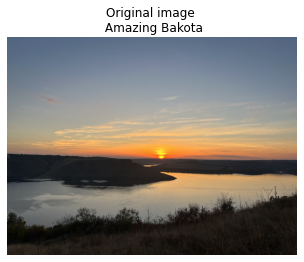

In [7]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image \n Amazing Bakota")
plt.imshow(image)
plt.show()

Done for 2. Processing next...
Done for 4. Processing next...
Done for 8. Processing next...
Done for 16. Processing next...
Done for 32. Processing next...
Done for 64. Processing next...


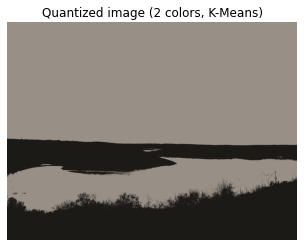

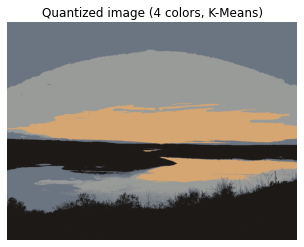

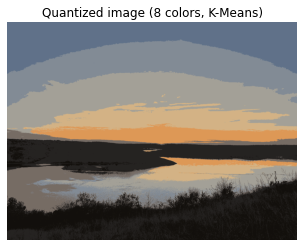

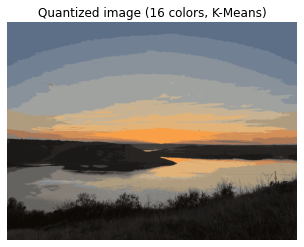

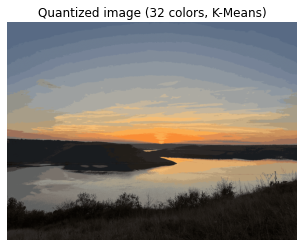

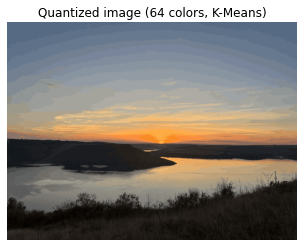

In [8]:
for i in [2, 4, 8, 16, 32, 64]:
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_array)

    codebook_random = shuffle(image_array, random_state=0, n_samples=i)
    
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    
    print(f"Done for {i}. Processing next...")
    
    plt.figure()
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({i} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))